# ANÁLISE EXPLORATÓRIA DOS DADOS

**Bibliotecas e Dependências**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
%matplotlib inline
sns.set_theme(style="whitegrid")

In [4]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Informações Iniciais sobre o DataSet**

In [16]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")


O dataset possui 374 linhas e 13 colunas.


In [18]:
print("Informações do DataFrame:")
print(" ")
df.info()

Informações do DataFrame:
 
<class 'pandas.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    str    
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    str    
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    str    
 9   Blood Pressure           374 non-null    str    
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    str    
dtypes: float64(1), int64(7), str(5)
memory usage: 38.1 KB


In [19]:
print("Descrição Estatística do DataFrame:")
df.describe()

Descrição Estatística do DataFrame:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [20]:
print("\nDados faltantes:")
print(df.isnull().sum().sort_values(ascending=False))


Dados faltantes:
Sleep Disorder             219
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
dtype: int64


Na coluna Sleep Disorder, o dado faltante indica que não há nenhum tipo de distúrbio do sono.

In [ ]:
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()

print(f"\nColunas Numéricas: {num_cols}")
print(f"\nColunas Categóricas: {cat_cols}")

# Visualização de distribuições numéricas
for col in num_cols:
    plt.figure(figsize=(12, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


Colunas Numéricas: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Colunas Categóricas: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


/var/folders/pc/qk6vq2t11svgypds6cx8xphm0000gn/T/ipykernel_37391/3637939107.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include="object").columns.tolist()


**Visualização de distribuições numéricas**

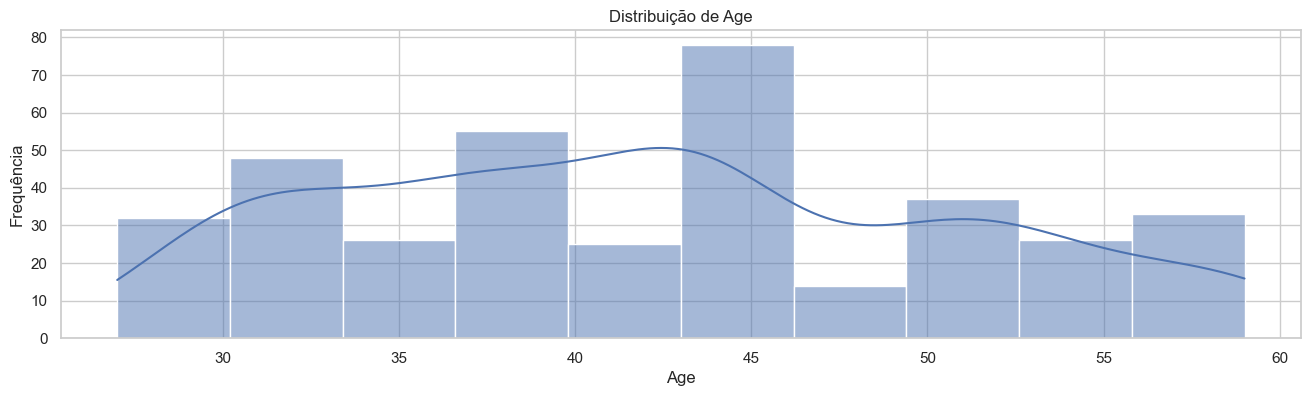

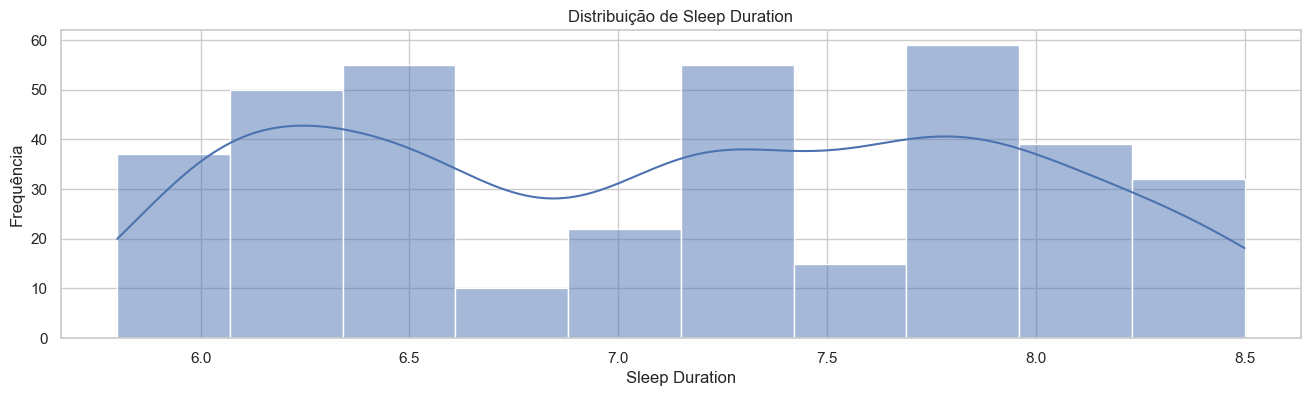

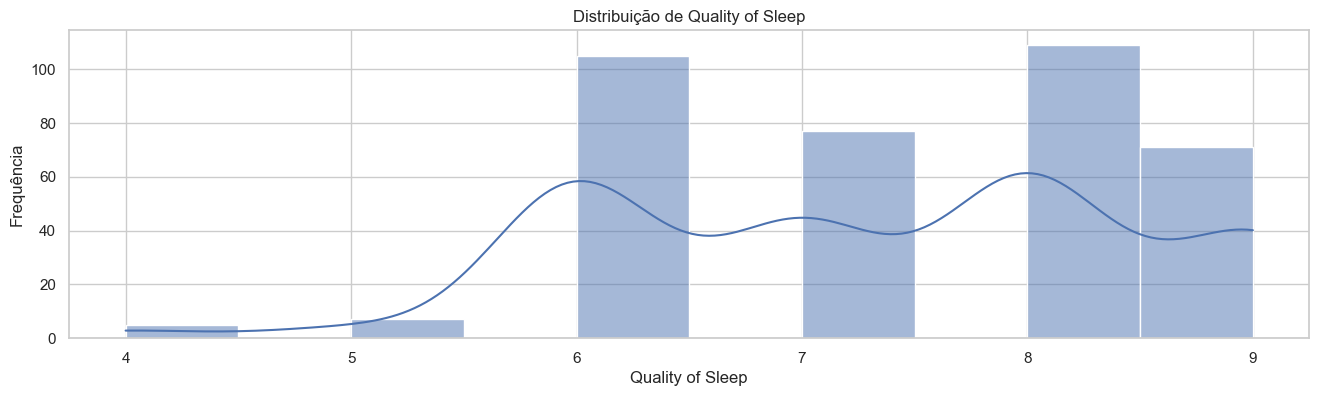

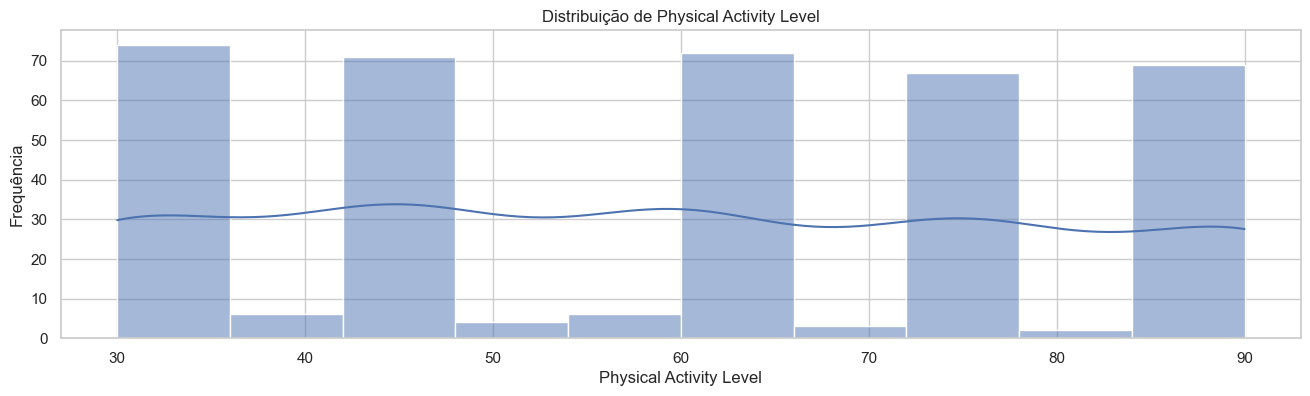

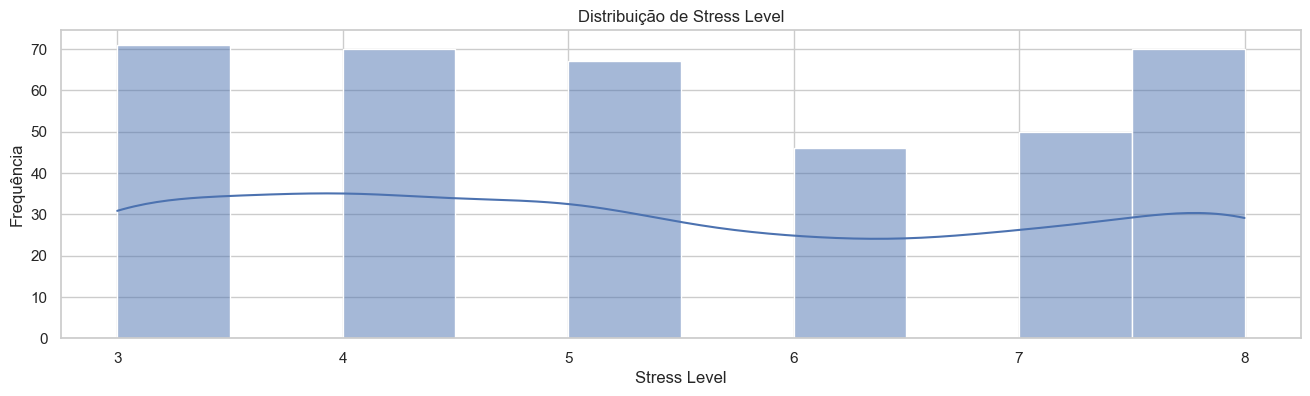

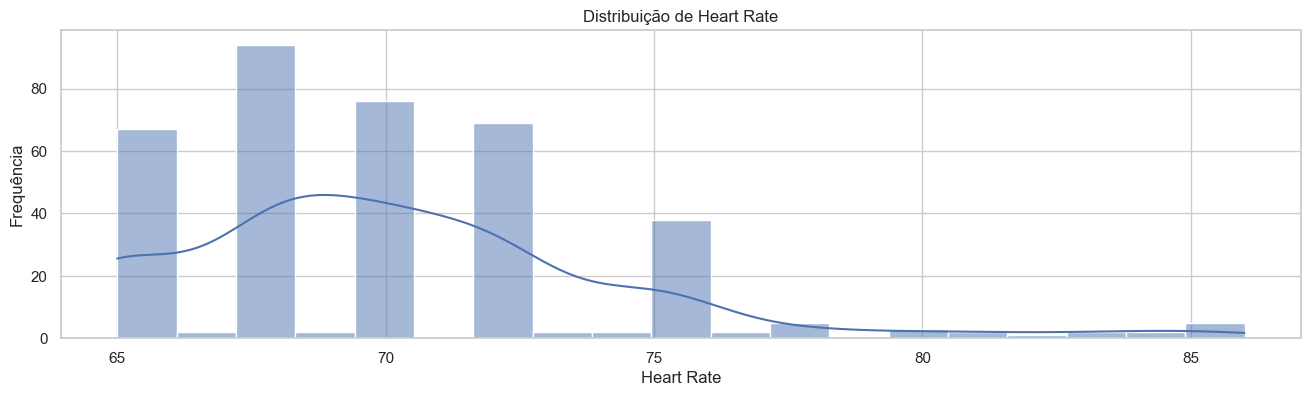

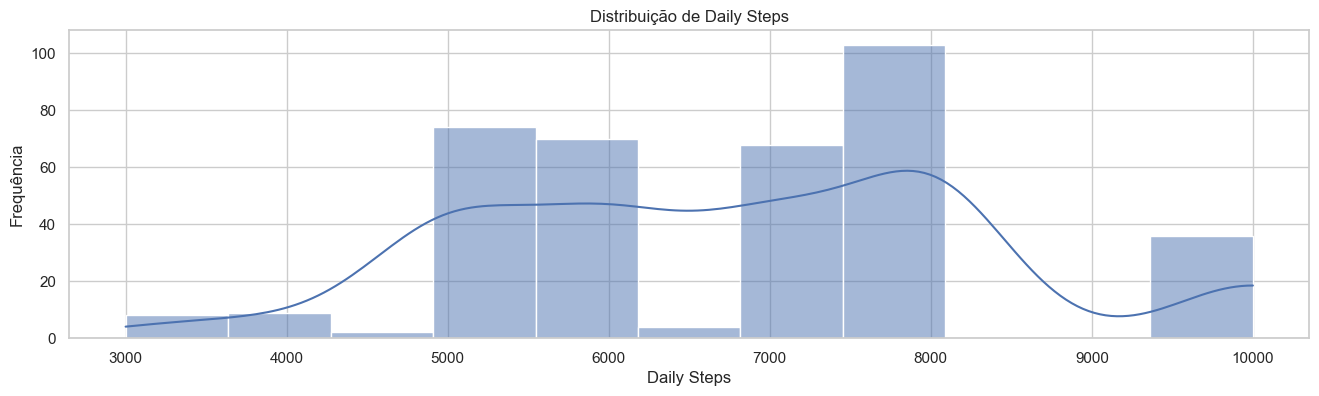

In [ ]:
#Em colunas numericas, 'Person ID' não é relevante para análise estatística, pois é apenas um identificador único.
for col in num_cols:
    if col != 'Person ID':
        plt.figure(figsize=(16, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.show()

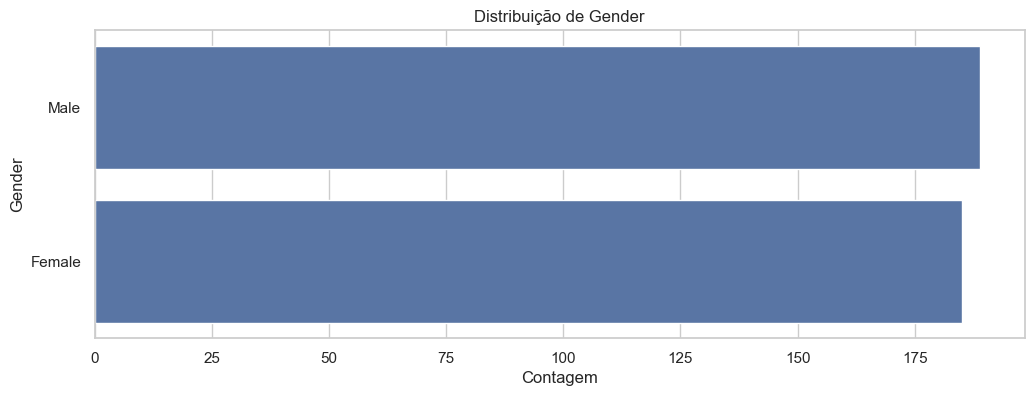

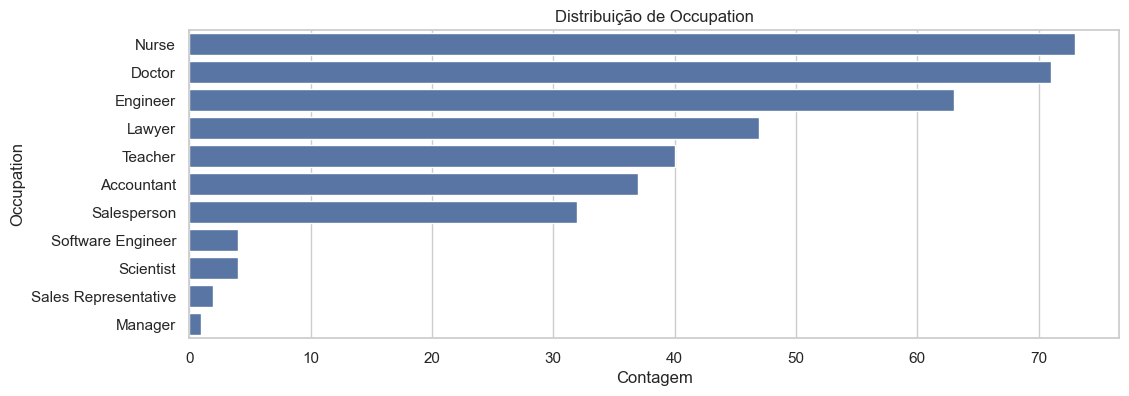

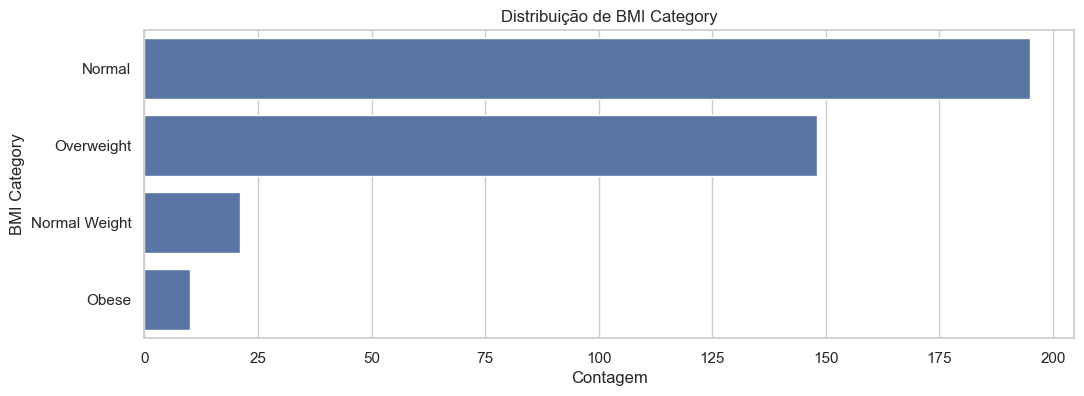

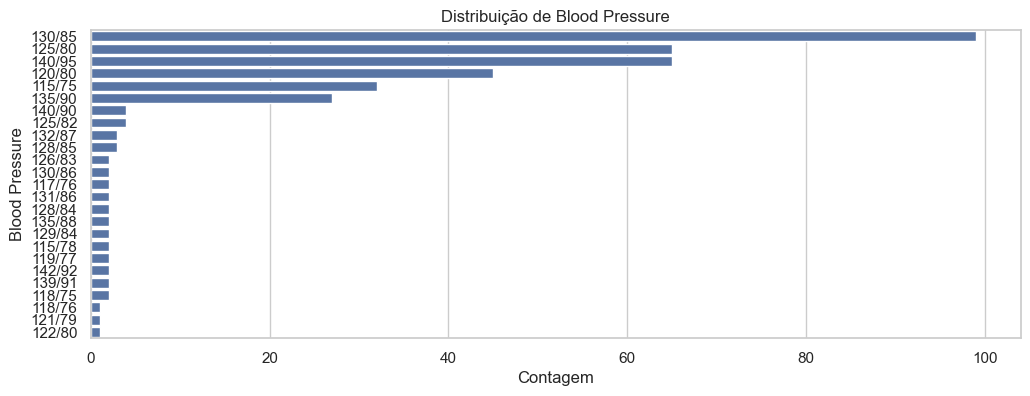

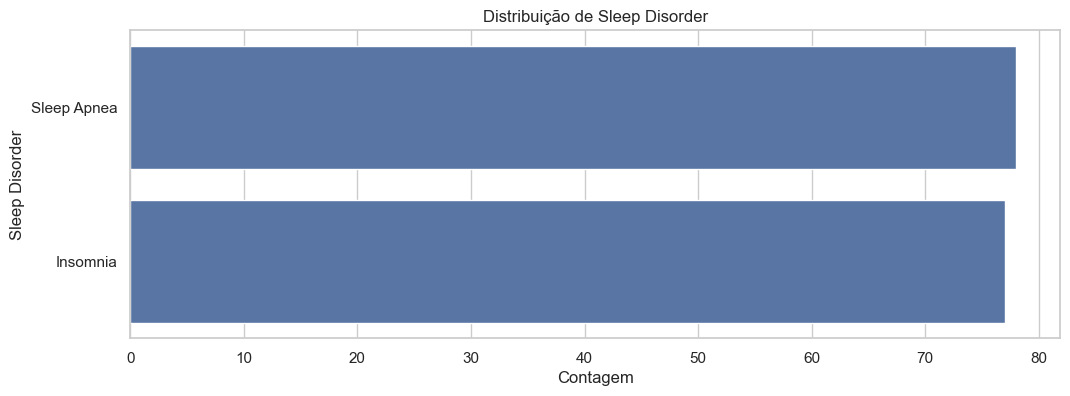

In [ ]:
# Visualização de distribuições categóricas
for col in cat_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Contagem')
    plt.ylabel(col)
    plt.show()

**Correlações entre as features**

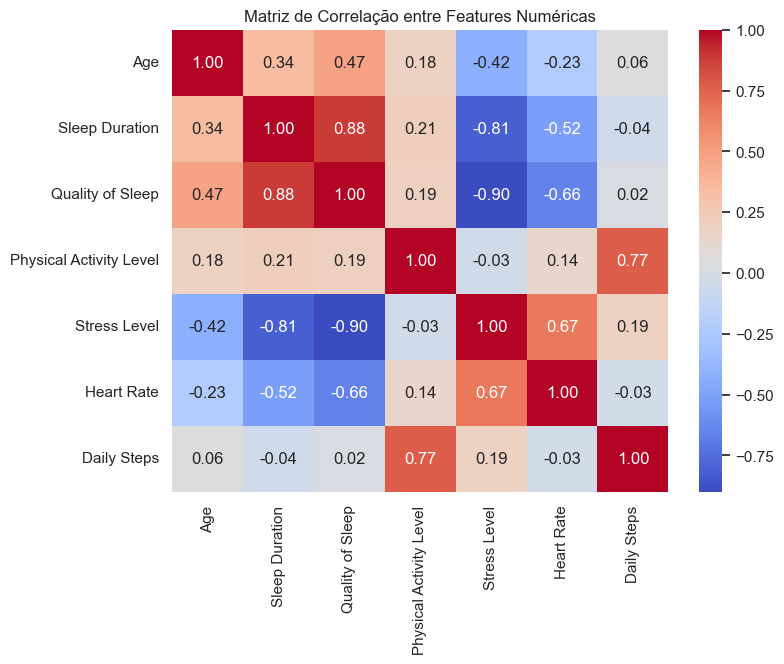

In [46]:
#Correlacao entre features Numéricas x Numérica
plt.figure(figsize=(8, 6))

num_cols_no_id = [col for col in num_cols if col != "Person ID"]

corr = df[num_cols_no_id].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação entre Features Numéricas')
plt.show()

O gráfico mostra que o sono e o estresse são os grandes protagonistas aqui. Existe uma conexão fortíssima: quanto menos a pessoa dorme e maior o nível de estresse, pior é a qualidade do sono percebida — o que faz todo sentido na vida real. Outro ponto claro é que o nível de atividade física e a contagem de passos andam praticamente juntos, então são informações que se confirmam. No fim das contas, o estresse parece ser o melhor "termômetro" para prever como anda a saúde do sono nesse grupo.

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


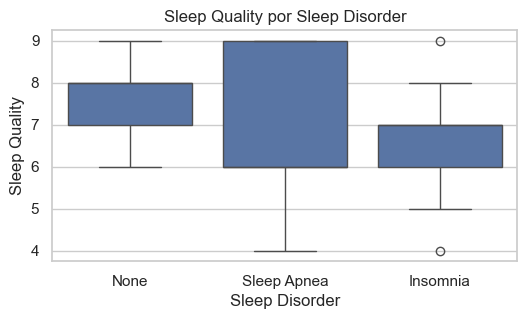

In [ ]:
#Correlacoes entre features Categóricas x Alvo
df_viz = df.copy()
df_viz["Sleep Disorder"] = df_viz["Sleep Disorder"].fillna("None")


plt.figure(figsize=(6, 3))
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=df_viz)
plt.title("Sleep Quality por Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep Quality")
plt.show()

Análise: Qualidade do Sono vs. Distúrbios

Diferenciação: O grupo saudável (None) possui a maior e mais estável qualidade de sono (mediana ~8).

Impacto da Insônia: Indivíduos com Insomnia apresentam uma queda clara na percepção de qualidade (mediana ~6.5).

Variabilidade na Apneia: O grupo Sleep Apnea é o mais inconsistente, com notas que variam do extremo baixo (4) ao alto (9), sugerindo que outros fatores (como peso ou idade) influenciam esse grupo.

Conclusão: A Quality of Sleep é um excelente preditor para o modelo, separando bem pessoas saudáveis de pessoas com insônia.

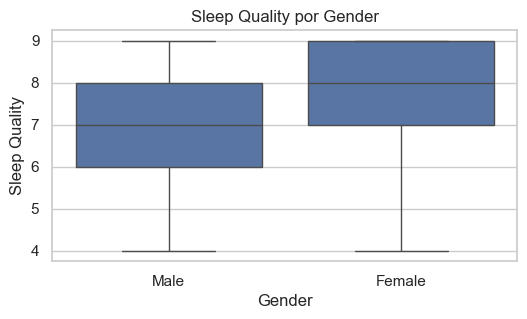

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(x="Gender", y="Quality of Sleep", data=df_viz)
plt.title("Sleep Quality por Gender")
plt.xlabel("Gender")
plt.ylabel("Sleep Quality")
plt.show()


Olhando para o gráfico, fica bem claro que existe uma diferença na percepção da qualidade do sono entre os gêneros. As mulheres não só apresentam uma mediana mais alta, como também uma concentração maior de notas no topo da escala. Enquanto os homens têm uma distribuição mais espalhada e centrada em notas menores, o grupo feminino parece desfrutar de um sono com qualidade superior de forma mais consistente.

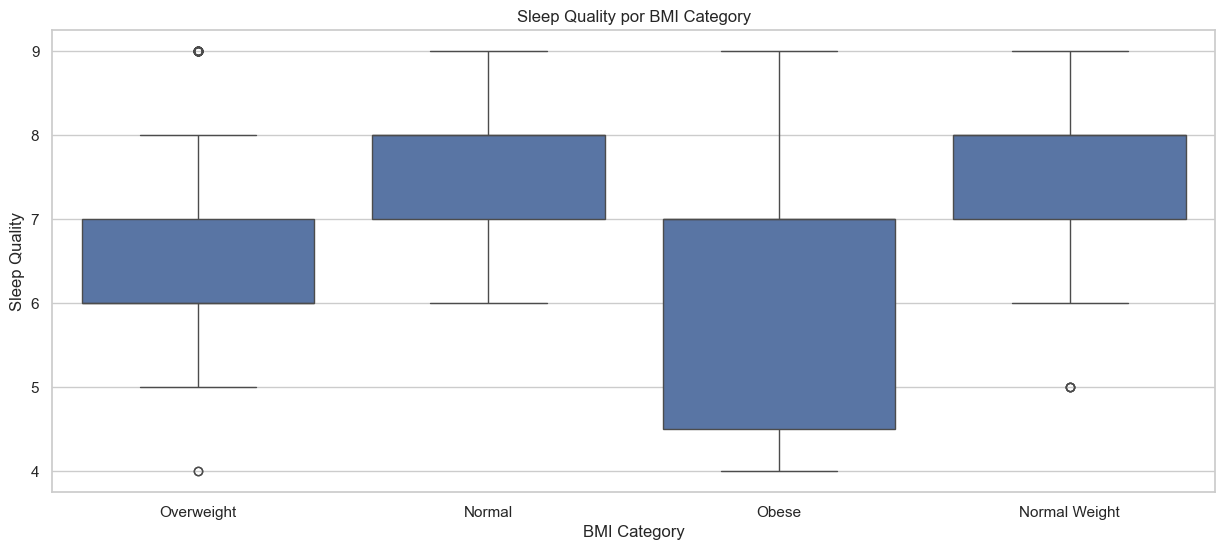

In [53]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="BMI Category", y="Quality of Sleep", data=df_viz)
plt.title("Sleep Quality por BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Quality")
plt.show()

In [ ]:
Aqui, percebemos que pessoas com obesidade tendem a relatar uma qualidade de sono significativamente pior em comparação com aqueles em categorias de IMC mais baixas. 
A mediana da qualidade do sono para o grupo de obesidade severa é visivelmente menor, 
e a dispersão dos dados indica que muitos indivíduos nessa categoria experimentam uma qualidade de sono baixa. 

Em contraste, aqueles na categoria de peso normal apresentam a melhor qualidade de sono, com uma mediana mais alta e menos variabilidade. 
Isso sugere uma correlação negativa entre o aumento do IMC e a qualidade do sono percebida.